In [2]:
import tensorflow as tf
import numpy as np
print("TF:", tf.__version__)

TF: 2.20.0


This section shows how TensorFlow represents scalars, vectors, matrices, and tensors.
Each example shows a different tensor rank and its corresponding shape.
The printed shapes illustrate how it is stored in TensorFlow.

In [3]:
# 1) Scalars, vectors, matrices, tensors
scalar = tf.constant(7) # rank-0
vector = tf.constant([10, 20, 30]) # rank-1
matrix = tf.constant([[1., 2.], [3., 4.]]) # rank-2
tensor = tf.constant([[[1],[2]], [[3],[4]]]) # rank-3 (2x2x1)
print(scalar.shape, vector.shape, matrix.shape, tensor.shape)

() (3,) (2, 2) (2, 2, 1)


TensorFlow assigns default data types to tensors.
Casting is used to change data types for compatibility and precision control.


In [4]:
# 2) Dtypes and casting
x = tf.constant([1.7, 7.4]) # float32 default
y = tf.constant([7, 10]) # int32 default
x16 = tf.cast(x, tf.float16) # reduced precision floats
y32 = tf.cast(y, tf.float32) # cast ints → floats

Tensor indexing and shape manipulation.
Dimensions can be added or removed to match required tensor formats.

In [5]:
# 3) Indexing and shaping
rank2 = tf.constant([[10, 7], [3, 4]])
last_col = rank2[:, -1] # column slice
expanded = tf.expand_dims(rank2, -1) # add channel-like axis
squeezed = tf.squeeze(expanded, axis=-1)

Basic tensor operations and broadcasting.
Matrix multiplication, aggregations, and one-hot encoding (index → binary vector).
Adding 10 and multiplying by 2 are applied to every element in the matrix.
The min, max, mean, and sum values summarize the random tensor into single numbers.


In [6]:
# 4) Broadcasting & basic ops
A = tf.constant([[10., 7.], [3., 4.]])
print("A+10:\n", A + 10)
print("A*2:\n", A * 2)
# 5) Matrix multiplication rules (inner dims match)
X = tf.constant([[1, 2], [3, 4], [5, 6]], dtype=tf.float32) # (3x2)
Y = tf.constant([[7, 8], [9, 10], [11, 12]], dtype=tf.float32) # (3x2)
XtY = tf.matmul(X, tf.transpose(Y)) # (3x2) @ (2x3) -> (3x3)
# 6) Aggregations
E = tf.constant(np.random.randint(0, 100, size=10))
print("min:", tf.reduce_min(E).numpy(),
"max:", tf.reduce_max(E).numpy(),
"mean:", tf.reduce_mean(tf.cast(E, tf.float32)).numpy(),
"sum:", tf.reduce_sum(E).numpy())
# 7) One-hot encoding
idx = tf.constant([0, 1, 2, 3])
oh = tf.one_hot(idx, depth=4)

A+10:
 tf.Tensor(
[[20. 17.]
 [13. 14.]], shape=(2, 2), dtype=float32)
A*2:
 tf.Tensor(
[[20. 14.]
 [ 6.  8.]], shape=(2, 2), dtype=float32)
min: 13 max: 95 mean: 47.6 sum: 476


## Converting a NumPy array to a TensorFlow tensor and back.

In [7]:
# 8) NumPy interop
arr = np.array([3., 7., 10.])
t = tf.constant(arr) # NumPy -> Tensor
back_to_np = t.numpy() # Tensor -> NumPy
print("OK")

OK


Test MAE: 16.102027893066406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


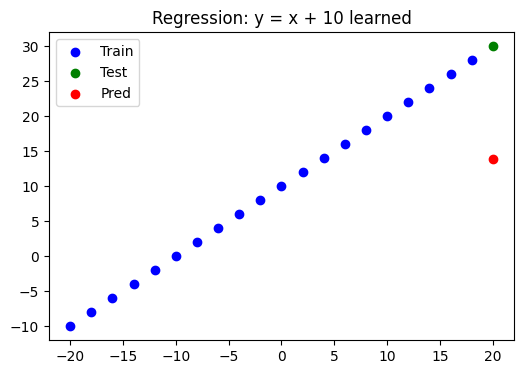

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Synthetic linear data
X = np.arange(-20, 21, 2, dtype=np.float32) # np.arange(start, stop, step) means: “Start at -20, keep adding 2, stop before 21” 
                                            # dtype=np.float32 just means:“Store these numbers as decimal numbers (floats), not integers”
y = X + 10                                  # Take each number in X and add 10 to it. 
                                            # So if X is [-20, -18, ..., 18, 20], then y will be [-10, -8, ..., 28, 30].
                                            # X is our input data (features), and y is our target data (Correct values) that we want to predict.
                                            # Why we do this?
                                            # We are not teaching the model the rule.
                                            # We are only giving it examples:
                                            # “When the input is -20, the correct answer is -10”
                                            # “When the input is 0, the correct answer is 10”
                                            # “When the input is 20, the correct answer is 30”
                                            # The model must figure out the pattern by itself.

# Train/test split (simple)                  Why?  Think of this like school:

                                            # Training data = practice questions + answers
                                            # Test data = exam questions
                                            # If you practice with the exam answers, the exam means nothing.
X_train, y_train = X[:20], y[:20]           # the first 20 examples for training (practice)
X_test, y_test = X[20:], y[20:]             # the last 20 examples for testing (exam)

# 1) CREATE # Setup the calculator (model) layers / Initialize the model
model = tf.keras.Sequential([               # means data will flow through these layers in order, one after the other. input → layer → output
tf.keras.layers.Input(shape=(1,)),          # Each input sample contains exactly one number (the x value).TensorFlow needs this to build weights matrices and avoid shape errors
tf.keras.layers.Dense(1)                    # This creates one neuron.
                                            # That neuron does exactly this math: output=(weight×input)+bias
])


# 2) COMPILE                                 # Decide how learning should work by choosing a loss function and an optimizer
model.compile(
loss="mae",                                 # Loss = how wrong the prediction is. Mean Absolute Error. It calculates |prediction − correct answer| 
                                            # for each example, then averages those errors across all examples. The model will try to minimize this number.
optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),  # Optimizer changes the weight and bias to reduce loss. Stochastic Gradient Descent (SGD) 
metrics=["mae"]                                         # Metrics is just for displaying the loss value during training. The learning rate controls how large each weight update is during training
)                                  

                    
# 3) FIT                                                # Practice using the training examples and improve the weight and bias.
                                                        # Learning and training happens here. The model looks at the training data, makes predictions, compares them to the correct answers, and updates its weights to get better.
history = model.fit(X_train, y_train, epochs=200, verbose=0) # silent training, epochs is how many times to loop over data

# Evaluate
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Test MAE:", mae)

# Predict and visualize
y_pred = model.predict(X_test).squeeze()
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, c='b', label='Train')
plt.scatter(X_test, y_test, c='g', label='Test')
plt.scatter(X_test, y_pred, c='r', label='Pred')
plt.legend(); plt.title("Regression: y = x + 10 learned")
plt.show()

The model learns a linear trend, but it does not match the true relationship y = x + 10.
Because the training data is limited, the model does not adjust its weights accurately, resulting in higher error.


Creating simple linear data and splitting it into training and test sets.

In [9]:
import matplotlib.pyplot as plt

# Synthetic linear data
X_train = np.arange(-20, 21, 2, dtype=np.float32) # [-20, -18, ..., 20]
y_train = X_train + 10
# Train/test split (simple)
X_train, y_train = X[:20], y[:20]
X_test, y_test = X[20:], y[20:]

Non-linear classification data was generated using circular patterns.
A neural network with non-linear layers was trained to separate the classes.
The model achieved perfect test accuracy and learned a curved decision boundary that matches the data.

Test accuracy: 0.985


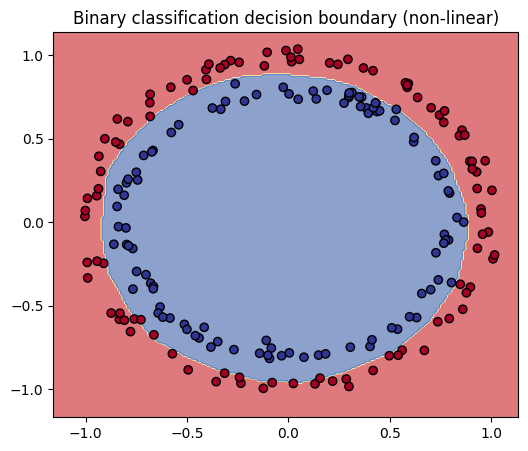

In [10]:

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
# Non-linear separable data
X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)
# 1) CREATE (use non-linear activations + sigmoid output)
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(2,)),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2) COMPILE
model.compile(
loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
metrics=["accuracy"]
)
# 3) FIT
history = model.fit(X_train, y_train, epochs=25, verbose=0)
# Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test accuracy: {acc:.3f}")


# Visualize decision boundary

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 200),
np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict(grid, verbose=0).reshape(xx.shape)
plt.figure(figsize=(6,5))
plt.contourf(xx, yy, (probs>0.5).astype(int), cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=plt.cm.RdYlBu, edgecolor='k')
plt.title("Binary classification decision boundary (non-linear)")
plt.show()


Fashion-MNIST images are loaded and scaled to values between 0 and 1.
A basic neural network is defined to classify images into 10 categories.

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Load Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Normalize to [0,1]
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
# 1) CREATE (flatten > Dense ReLU > Dense softmax)
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(28, 28)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])


The model is trained and evaluated on Fashion-MNIST data.
Accuracy shows how many images are classified correctly.
Predicted class indices represent the category the model is most confident about for each image, such as the ankle boot.

Test accuracy: 0.8804000020027161
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


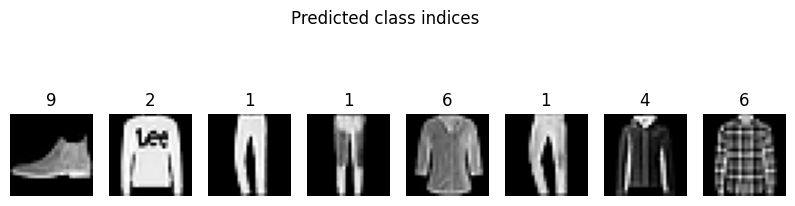

In [12]:
# 2) COMPILE
model.compile(
loss="sparse_categorical_crossentropy", # labels are ints, not one-hot
optimizer="adam",
metrics=["accuracy"]
)
# 3) FIT
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1, verbose=0)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)
# Show a few preds
preds = model.predict(x_test[:8]).argmax(axis=1)
plt.figure(figsize=(10,3))
for i in range(8):
	plt.subplot(1,8,i+1)
	plt.imshow(x_test[i], cmap='gray')
	plt.title(int(preds[i]))
	plt.axis('off')
plt.suptitle("Predicted class indices"); plt.show()

Fashion-MNIST is reduced to two classes to create a binary classification task.
A small CNN is trained to distinguish between ankle boots and sneakers.
The model achieves high test accuracy, showing it can separate the two classes well.


In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Use Fashion-MNIST but map 2 classes to a binary task (e.g., class 9=Ankle boot vs 7=Sneaker)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
# Keep only classes 7 and 9
train_mask = np.isin(y_train, [7, 9])
test_mask = np.isin(y_test, [7, 9])
x_train = x_train[train_mask][..., None]/255.0
y_train = (y_train[train_mask] == 9).astype(np.float32) # 1 if class 9 else 0
x_test = x_test[test_mask][..., None]/255.0
y_test = (y_test[test_mask] == 9).astype(np.float32)


In [14]:
# 1) CREATE (small CNN)
model = tf.keras.Sequential([
tf.keras.layers.Input(shape=(28,28,1)),
tf.keras.layers.Conv2D(16, 3, activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Conv2D(32, 3, activation="relu"),
tf.keras.layers.MaxPool2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2) COMPILE
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)
# 3) FIT
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1, verbose=0)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy:", acc)

Test accuracy: 0.9700000286102295


CIFAR-10 data is filtered to three classes and normalized.
A small convolutional neural network is trained for multi-class image classification.
Test accuracy shows how well the CNN generalizes to unseen images.

In [15]:
# Data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Keep classes 0,1,2 only
mask_train = (y_train < 3).flatten()
mask_test = (y_test < 3).flatten()
x_train = x_train[mask_train].astype("float32")/255.0
y_train = y_train[mask_train].flatten()
x_test = x_test[mask_test].astype("float32")/255.0
y_test = y_test[mask_test].flatten()

# Small CNN model
model = tf.keras.models.Sequential([
	tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"),
	tf.keras.layers.MaxPooling2D(),
	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(64, activation="relu"),
	tf.keras.layers.Dense(3, activation="softmax")
])
model.compile(
	loss="sparse_categorical_crossentropy",
	optimizer="adam",
	metrics=["accuracy"]
)
# Train
history = model.fit(
x_train, y_train,
epochs=5,
batch_size=64,
validation_split=0.1,
verbose=1
)
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print("Test accuracy (tiny CNN):", acc)

c:\Users\cathi\IoT -Pipeline\IoT-Pipeline\tf-venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")
c:\Users\cathi\IoT -Pipeline\IoT-Pipeline\tf-venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.7100 - loss: 0.6734 - val_accuracy: 0.8260 - val_loss: 0.4583
Epoch 2/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.8366 - loss: 0.4108 - val_accuracy: 0.8420 - val_loss: 0.3947
Epoch 3/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8712 - loss: 0.3328 - val_accuracy: 0.8807 - val_loss: 0.3340
Epoch 4/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.8855 - loss: 0.2951 - val_accuracy: 0.9033 - val_loss: 0.2703
Epoch 5/5
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9049 - loss: 0.2497 - val_accuracy: 0.9033 - val_loss: 0.2605
Test accuracy (tiny CNN): 0.8953333497047424


Convolutional neural networks can learn visual patterns directly from images.